<a href="https://colab.research.google.com/github/apalumbo5/COVID-Recession/blob/main/recessiondata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
np.set_printoptions(suppress=True)

In [ ]:
!pip install -U -q PyDrive
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
downloaded = drive.CreateFile({'id':}) # replace the id with id of file you want to access. Do this for each file
downloaded.GetContentFile('data.csv')

In [ ]:
df20 = pd.read_csv("2020.csv")

In [ ]:
df19 = pd.read_csv("2019.csv")

In [ ]:
# remove CA, AZ, NY, VA, TX from 'state'

df20 = df20[~df20['state'].isin(['CA', 'AZ', 'NY', 'VA', 'TX'])]
df19 = df19[~df19['state'].isin(['CA', 'AZ', 'NY', 'VA', 'TX'])]


In [ ]:
df19['Year'] = 2019
df20['Year'] = 20

In [ ]:
df_ALL = df_ALL[~df_ALL['STAABBRV'].isin(['CA', 'AZ', 'NY', 'VA', 'TX'])]

In [ ]:
df_All = df_All.drop(['LAT', 'LONG', 'Right_ZIP_CODE', 'Right_ZIP4'], axis=1)

In [ ]:
df_All.rename(columns={'ZIP_CODE': 'zip'}, inplace=True)

In [ ]:
df_All['zip'] = df_All['zip'].astype(str)
df_All['ZIP4'] = df_All['ZIP4'].astype(str)
df_All['zip'] = df_All['zip'] + df_All['ZIP4']
df_All = df_All.drop(columns=['ZIP4'])

In [ ]:
if df_All['zip'].dtype == 'object':
    df_All['zip'] = df_All['zip'].astype('int64')
else:
    df20['zip'] = df20['zip'].astype('object')

In [ ]:
# Combine df_ALL, df20, and df19 on 'zip'

df2 = pd.merge(df_All, df20, on='zip', how='inner')
df = pd.merge(df2, df19, on='zip', how='inner')


In [ ]:
# remove 'state' and 'STAABBRV'

df = df.drop(['state_x', 'state_y'], axis=1)


In [ ]:
# Convert 20_CRRTTPE into 0 if 'C', 'B' otherwise '1'

df['20_CRRTTYPE'] = df['20_CRRTTYPE'].apply(lambda x: 0 if x in ['C', 'B'] else 1)


In [ ]:
# Delete columns where standard deviation = 0 drop '20_CRRTTYPE

import numpy as np


# Find the standard deviation of each column
std_devs = df.std(axis=0)

# Find the columns where the standard deviation is 0
zero_std_cols = std_devs[std_devs == 0].index.tolist()

# Drop the columns with zero standard deviation
df = df.drop(zero_std_cols, axis=1)




In [ ]:
df.shape

In [ ]:
# Remove 0s from 20_HH20  20_AVGHHSIZE and 20_MEDAGHHER


df['20_AVGHHSIZE'] = df['20_AVGHHSIZE'].replace(0, np.nan)
df['20_MEDAGHHER'] = df['20_MEDAGHHER'].replace(0, np.nan)


In [ ]:
#Calculate diversity index
df['diversity_index'] = 1 - ((df['19_PCTWHPOP'] / 100)**2 + (df['19_PCTBLPOP'] / 100)**2 + (df['19_PCTHISPOP'] / 100)**2)
print(df['diversity_index'])

In [ ]:
# Find missing values

missing_values = df.isnull().sum()

# Print the number of missing values in each column
print(missing_values)


In [ ]:
# Delete missing values

df = df.dropna()


In [ ]:

df.describe().drop(columns=['zip']).T


In [ ]:
import pandas as pd

# Calculate pairwise correlation
correlation_matrix = df.corr()

threshold = 0.8  # Set correlation threshold
high_correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

features_to_remove = set()
for pair in high_correlation_pairs:
    features_to_remove.add(pair[1])
# Remove highly correlated features from the dataset
df_filtered = df.drop(features_to_remove, axis=1)



In [ ]:
df_filtered

In [ ]:
# Heatmap of features

import seaborn as sns
import matplotlib.pyplot as plt

df_All_corr = df_All.drop(columns=['zip', 'STAABBRV', '20_CRRTTYPE']).corr()

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_All_corr, annot=True, fmt=".1g", ax=ax, cmap="coolwarm")
plt.show()


In [ ]:
# Diversity index distribution plot
sns.displot(df_filtered, x="diversity_index", bins=12)
plt.show()


In [ ]:
#100 - 19_PCTWHPOP = pct_nonwhite

df_filtered['pct_nonwhite'] = 100 - df_filtered['19_PCTWHPOP']


In [ ]:
df.drop(columns=['19_PCTWNHPOP', '19_PCTBLPOP', '19_PCTHISPOP, '19_PCTWHPOP'], axis=1)

In [ ]:
# Calculate difference in months since last delinquency

df_selected.loc[:, 'delinq_diff'] = df_selected['at36_x'] - df_selected['at36_y']

df_selected['delinq_diff'].describe()


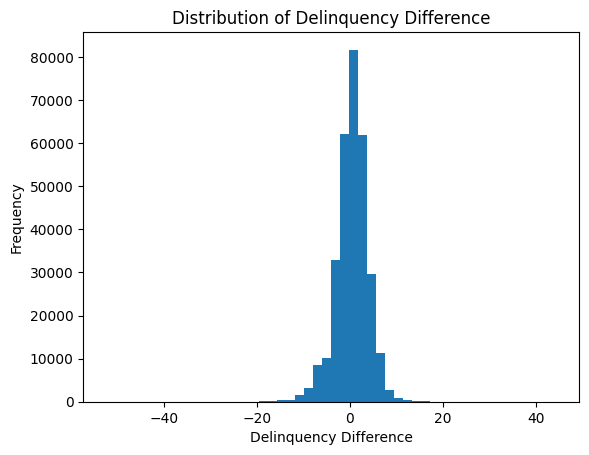

In [ ]:
# Distribution of delinq_diff spread out

df_selected['delinq_diff'].plot.hist(bins=50)
plt.xlabel('Delinquency Difference')
plt.ylabel('Frequency')
plt.title('Distribution of Delinquency Difference')
plt.show()


In [ ]:
df['19_PCTWHPOP'].plot(kind='hist', bins=10, figsize=(10, 8))
plt.xlabel('19_PCTWHPOP')
plt.ylabel('Frequency')
plt.title('% of White Population')
plt.show()

df['19_PCTBLPOP'].plot(kind='hist', bins=10, figsize=(10, 8))
plt.xlabel('19_PCTBLPOP')
plt.ylabel('Frequency')
plt.title('% of Black Population')
plt.show()

df['19_PCTHISPOP'].plot(kind='hist', bins=10, figsize=(10, 8))
plt.xlabel('19_PCTHISPOP')
plt.ylabel('Frequency')
plt.title('% of Hispanic Population')
plt.show()


In [ ]:

df['pct_nonwhite'].plot(kind='hist', bins=10, figsize=(7, 5))
plt.xlabel('pct_nonwhite')
plt.ylabel('Frequency')
plt.title('Distribution of pct_nonwhite')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df_filtered.drop(columns=[ 'zip', 'at36_x', 'at36_y' 'delinq_diff' ])
y = df_filtered['delinq_diff']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Instantiate the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# You can also examine the model coefficients if needed
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


In [ ]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()

# Print the summary statistics of the model
print(model.summary())


In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X1.iloc[:, 0], y=residuals, color='blue')
plt.title('Residual Plot for Linear Regression Model')
plt.xlabel('Predictor Variable')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.grid(True)
plt.show()

In [ ]:
# prompt: plot feature importance

importances = model.coef_
features = X.columns

plt.figure(figsize=(10, 6))
plt.bar(features, importances, color='blue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


In [ ]:
# Random forest regression with 'delinq_diff' as target variable

from sklearn.ensemble import RandomForestRegressor

# Drop 'Year_x', 'zip' columns from the DataFrame
X = df_filtered.drop(columns=[ 'zip', '20_CRRTTYPE', '20_AVGHHSIZE', '20_HH20', '20_MEDAGHHER','20_POPGROW20', '20_MEDVEHICLE', 'at36_y', 'diversity_index', 'delinq_diff', 'at36_x'])

# Define target variable
y = df_filtered['at36_y']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model1 = RandomForestRegressor(n_estimators=150, random_state=42)

# Fit the model on the training data
model1.fit(X_train, y_train)

# Predict on the test data
y_pred = model1.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print("Feature importances:", model1.feature_importances_)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse}")
print(f"R^2 score: {r2}")


In [ ]:
importances = model1.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))delinq
plt.barh(features, importances, align='center')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Random Forest Model')
plt.show()

In [ ]:
# residual model for random forest regression

import numpy as np
import matplotlib.pyplot as plt

# Calculate the residuals
residuals = y_test - y_pred

plt.scatter(y_test, residuals)

plt.axhline(0, linestyle='--', color='red')

plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Random Forest Regression')

plt.show()

# Calculate the mean and standard deviation of the residuals
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)

print(f"Mean residual: {mean_residual}")
print(f"Standard deviation of residuals: {std_residual}")